# CNN_MNIST_DIGIT_CLASSIFICATION

### GOAL OF THIS PROJECT
The mnist dataset containing 70000 images of handwritten digit 0 to 9. The GOAL is to build a model to predict the digit correctly Acoording to the GOAL it is a multiclass classification problem. The firdt 60000 data is already ready for training purpose and rests are for test purpose.
### STRATEGY FOR THIS PROJECT
As this is a image problem, I use CNN for training this.

In [1]:
# importing python linraries

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the MNIST data module from tensorflow
mnist = tf.keras.datasets.mnist

In [3]:
# Load data set
(X_train,y_train), (X_test,y_test) =  mnist.load_data()

In [4]:
print(f"X_train_shape : {X_train.shape} \ny_train.shape {y_train.shape}")

X_train_shape : (60000, 28, 28) 
y_train.shape (60000,)


label for oth item is  5


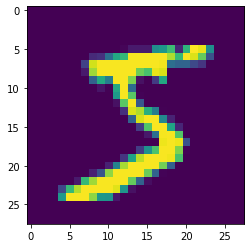

In [6]:
plt.imshow(X_train[0])
print("label for oth item is ",y_train[0])

In [124]:
X_train.shape

(60000, 28, 28)

In [4]:
# reshape the dataset to 1*row*col 1 because it is greyscale so only 1 channel is needed

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(f"train-shape = {X_train.shape}\ntest-shape = {X_test.shape}")

train-shape = (60000, 28, 28, 1)
test-shape = (10000, 28, 28, 1)


In [5]:
# convert int to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalize the input to 0-1 
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
# one-hot-encoding for the label because it is multiclass classification problem
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train.shape


(60000, 10)

In [8]:
# total class 
total_classes = y_train.shape[1]
total_classes

10

## The outline for the training process of the dataset

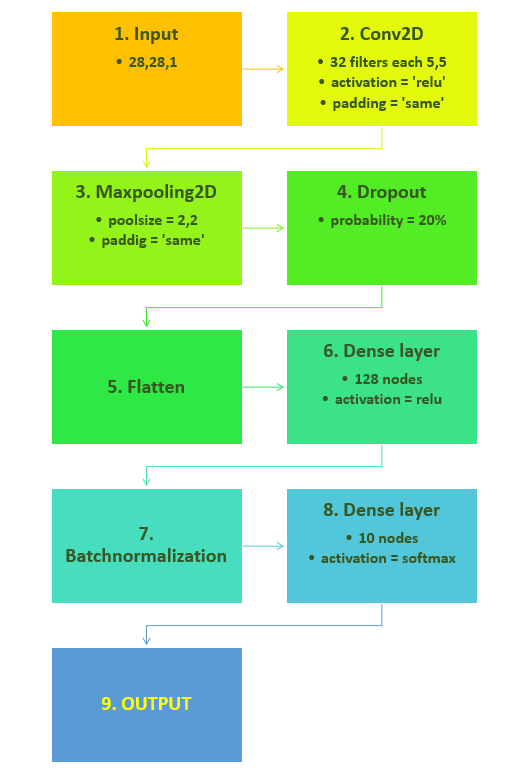

In [9]:
# create sequential cnn model

model = Sequential([
    Conv2D(32, (5,5), input_shape=(28,28,1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2),padding="SAME"),
    Dropout(0.4),
    Flatten(),
    Dense(128,activation='relu'),
    (BatchNormalization()),
    Dense(total_classes,activation='softmax')
])



In [10]:
# compile the model
# loss = categorical_crossentropy
# optimization technique = adam
# metrics = accuracy

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                          

In [12]:
# model fit
#@tf.autograph.experimental.do_not_convert
#model.fit(X_train, y_train, epochs=10, batch_size=200,validation_split=0.05)
history = model.fit(X_train, y_train, epochs=20, batch_size=200,validation_split=0.05).history
#history

Epoch 1/20
285/285 [==============================] - 25s 88ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 2/20
285/285 [==============================] - 30s 104ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 3/20
285/285 [==============================] - 25s 89ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0414 - val_accuracy: 0.9883
Epoch 4/20
285/285 [==============================] - 25s 87ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 5/20
285/285 [==============================] - 25s 89ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0438 - val_accuracy: 0.9890
Epoch 6/20
285/285 [==============================] - 25s 88ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0402 - val_accuracy: 0.9893
Epoch 7/20
285/285 [==============================] - 25s 87ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0428 - val_accuracy

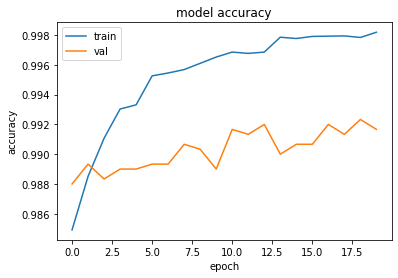

In [13]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

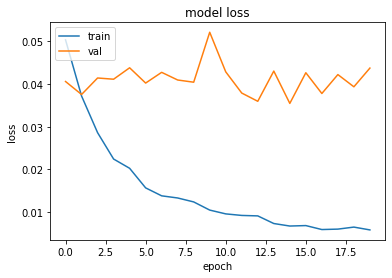

In [14]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [15]:
# Evaluate the model on the test set.
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0337 - accuracy: 0.9901


[0.03370877355337143, 0.9901000261306763]

In [16]:
#save the model
model.save('cnn_mnist_digit.h5')

In [17]:
#print model image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
# model predict

img = X_train[0]
img = img.reshape(1,28,28,1)

predict_value = model.predict(img)
np.argmax(predict_value)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


5